<a href="https://colab.research.google.com/github/byundonghwan/maching_learning_basic/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%9D%B4%EB%A1%A0_%EB%B0%8F_%EC%8B%A4%EC%8A%B5_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

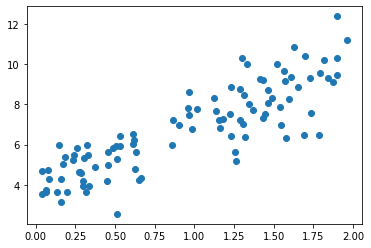

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = 2 * np.random.rand(100,1) # 0 ~ 1사이의 균일분포 => shape : 100 X 1 
y = 4 + 3 * x + np.random.randn(100, 1) # normal 분포 mu = 0, var = 1 shape : 100 X 1 
plt.scatter(x,y)
plt.show()

In [2]:
x_b = np.c_[np.ones((100,1)),x] # 모든 샘플에 index 0번에 1을 추가.

# np.linalg.inv는 넘파이 선형대수 모듈(linalg)의 inv(역함수)
# .dot은 행렬 곱셈.

theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.86288067],
       [3.07111742]])

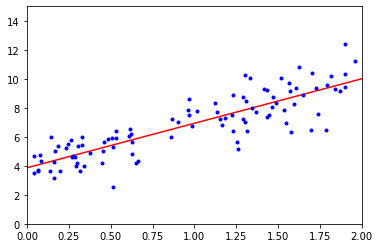

In [3]:
# theta_best를 사용해서 y 값 예측.
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)), x_new]

# y = wx
prediction = x_new_b.dot(theta_best)

plt.plot(x_new, prediction, "r-")
plt.plot(x, y, 'b.')
plt.axis([0, 2, 0, 15]) # x축 범위 0 ~ 2, y축 범위 0 ~ 15
plt.show()

In [4]:
# 위의 작업을 사이킷런 라이브러리를 사용하여 구현.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(x_new))

[3.86288067] [[3.07111742]]
[[ 3.86288067]
 [10.0051155 ]]


In [5]:
# 경사하강법 구현 (implementation)
import numpy as np

x = 2 * np.random.rand(100, 1) # 100 X 1
x_b = np.c_[np.ones((100, 1)), x]
y = 4 + 3 * np.random.randn(100, 1)

learning_rate = 0.001
iterations = 1000
m = x_b.shape[0] # x의 데이터 수

theta = np.random.randn(2, 1)

for iteration in range(iterations):
  gradients = 2/m*x_b.T.dot(x_b.dot(theta) - y)
  theta = theta - (learning_rate * gradients)

theta


array([[2.71841701],
       [1.23525063]])

In [6]:
# 확률적 경사 하강법 구현 (implementation)
epochs = 1000
t0, t1 = 5, 50 # 학습 스케줄(하이퍼 파라미터)
m = x_b.shape[0] # 100개 (x 데이터)

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2, 1) # 2x1 크기의 평균 0, 분산 1 정규 분포 추출.

for epoch in range(epochs):
  for i in range(m):
    random_index = np.random.randint(m) # 0 ~ m-1 까지 랜덤 숫자 1
    xi = x_b[random_index : random_index + 1] # 1 x 2 크기
    yi = y[random_index : random_index + 1] # 1 x 1 크기
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
    learning_rate = learning_schedule(epoch*m + i)
    theta = theta - learning_rate * gradients

theta

array([[4.13913275],
       [0.12855737]])